In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Haberman Dataset contains the cases from a study conducted between 1958 and 1970 on the 
#survival of the patients who have undergone surgery for breast cancer.
#Age of the patient at the time of operation=age
#Patients year of operation=operation_year
#Number of positive axiliary nodes detected=axil_nodes
#Survival Status if it is 1 that means patient survived 5 years or longer
#more than 1-patient died within 5 years
#labels use to give name of the features 
labels=['age','operation_year','axil_node','survival_status']

#Loading the haberman dataset into the data frame
haberman=pd.read_csv('haberman.csv',names=labels)
haberman.head()




,age,operation_year,axil_node,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


**Objective**
To analyze how many patients survived in 5 years depending on the age,operation year and the axil node

In [9]:
#How many datapoints and features
haberman.shape

(306, 4)

In [10]:
#Feature or column names in dataset
haberman.columns

Index(['age', 'operation_year', 'axil_node', 'survival_status'], dtype='object')

In [11]:
#How many datapoints for each class
haberman['survival_status'].value_counts()


1    225
2     81
Name: survival_status, dtype: int64

**Observation**

1. 225 patients who survived 5 years or longer

2. 81 patients who  died within 5 years

3. It is imbalanced dataset since 225 of patients are survived out of 306


# Bivariate Analysis- 2-D Scatter plot,Pair Plots

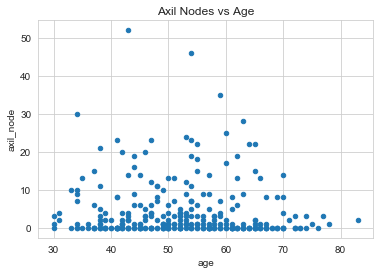

In [38]:
haberman.plot(kind='scatter',x='age',y='axil_node')
plt.title('Axil Nodes vs Age')
plt.show();

**Observation**
1. Most of patients whose axil_nodes is 0 are within age  32 to 70

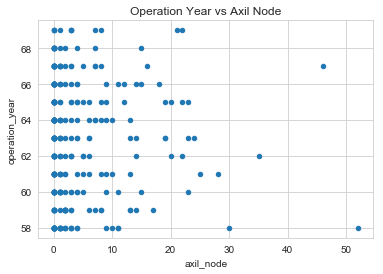

In [39]:
haberman.plot(kind='scatter',x='axil_node',y='operation_year')
plt.title('Operation Year vs Axil Node')
plt.show();

**Observation**
1. It is hard to analyze this plot

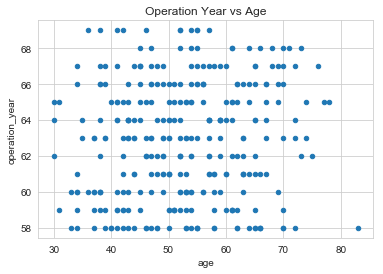

In [40]:
haberman.plot(kind='scatter',x='age',y='operation_year')
plt.title('Operation Year vs Age')
plt.show();

**Observation**
1. Most of patients in age range from 32 to 70 were operated 

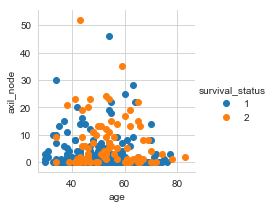

In [47]:
#2-D scatter plot with color coding for each class
sns.set_style('whitegrid');
sns.FacetGrid(haberman,hue='survival_status',height=3) \
  .map(plt.scatter,'age','axil_node') \
  .add_legend()
plt.show();

Observation:
1. There are more number of points on axil node=0
2. Most of datapoints are overlapping

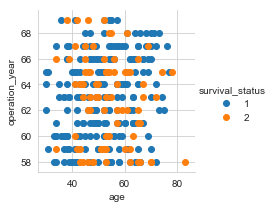

In [52]:
sns.set_style('whitegrid');
sns.FacetGrid(haberman,hue='survival_status',height=3) \
  .map(plt.scatter,'age','operation_year') \
  .add_legend()
plt.show();

Observation
1. More operations took place between 1958 to 1968
2. More patients expired between 40 to 60

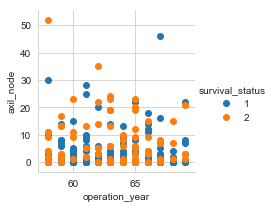

In [53]:
sns.set_style('whitegrid');
sns.FacetGrid(haberman,hue='survival_status',height=3) \
  .map(plt.scatter,'operation_year','axil_node') \
  .add_legend()
plt.show();

Observation
1. The datapoints are overlapping

# Pair Plots

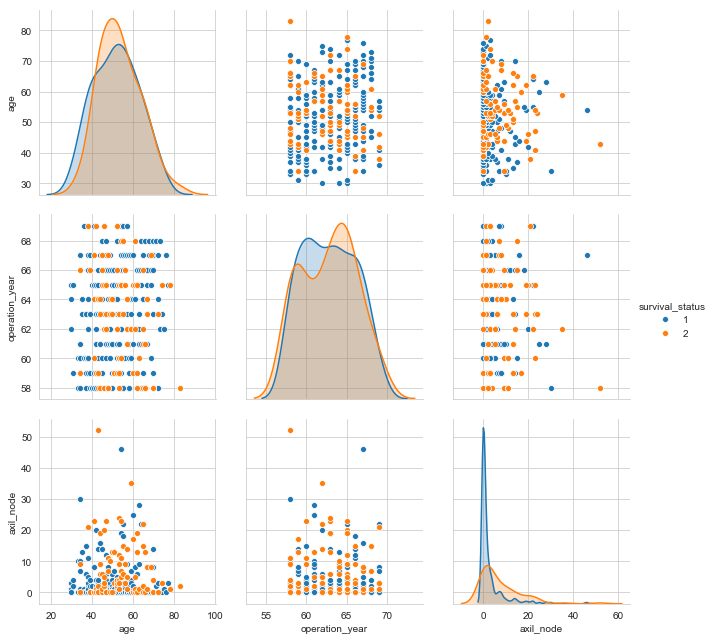

In [41]:
plt.close();
sns.set_style('whitegrid')
sns.pairplot(haberman,hue='survival_status',vars=['age','operation_year','axil_node'],height=3)
plt.show();


# Histogram ,PDF,CDF

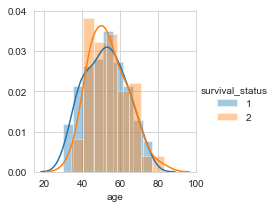

In [28]:
sns.FacetGrid(haberman,hue='survival_status',height=3)\
.map(sns.distplot,'age')\
.add_legend();
plt.show();

Observation
1. Probablity of patients surviving and not surving is in range from age 30 to 80
 

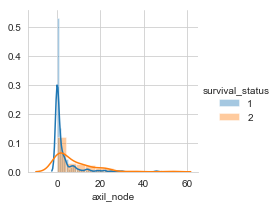

In [21]:
sns.FacetGrid(haberman,hue='survival_status',height=3)\
.map(sns.distplot,'axil_node')\
.add_legend();
plt.show();

Observation
1. Patients with zero axil_node have very more chances of surviving
2. Patients with higher axil_node has less chances of surviving

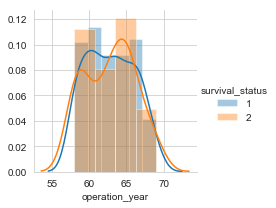

In [22]:
sns.FacetGrid(haberman,hue='survival_status',height=3)\
.map(sns.distplot,'operation_year')\
.add_legend();
plt.show();

Observation
1. Patients operated between 1960-1966 had less chances of surviving


In [60]:
survived=haberman.loc[haberman['survival_status']==1]
expired=haberman.loc[haberman['survival_status']>1]

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


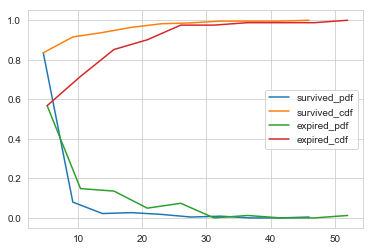

In [65]:

counts,bin_edges=np.histogram(survived['axil_node'],bins=10,density=True);
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
#CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges=np.histogram(expired['axil_node'],bins=10,density=True);
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
#CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['survived_pdf','survived_cdf','expired_pdf','expired_cdf'])
plt.show();

**Observation**
1. 79% of patients who have survived have axile nodes between 0 to 4 

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


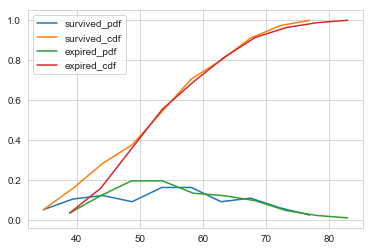

In [66]:
counts,bin_edges=np.histogram(survived['age'],bins=10,density=True);
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
#CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges=np.histogram(expired['age'],bins=10,density=True);
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
#CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['survived_pdf','survived_cdf','expired_pdf','expired_cdf'])
plt.show();

**Observation**
1. It is very difficult to classify classes using age plot

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


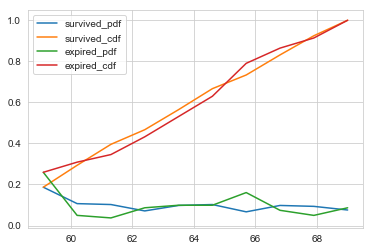

In [67]:
counts,bin_edges=np.histogram(survived['operation_year'],bins=10,density=True);
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
#CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts,bin_edges=np.histogram(expired['operation_year'],bins=10,density=True);
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
#CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.legend(['survived_pdf','survived_cdf','expired_pdf','expired_cdf'])
plt.show();

# Box plot,violin plot

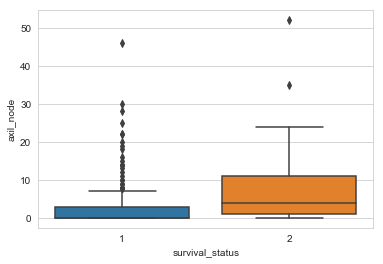

In [83]:
sns.boxplot(y='axil_node',x='survival_status',data=haberman)
plt.show();

Observation
1. Patients with 0 axil node have more chances of surving 
2. Patients with axil node greater than 1 have less chances of surviving

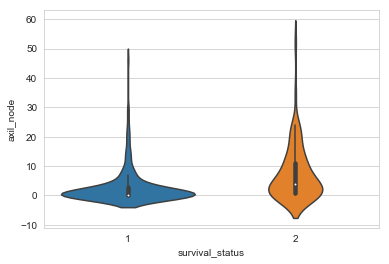

In [27]:
sns.violinplot(x='survival_status',y='axil_node',data=haberman)
plt.show();

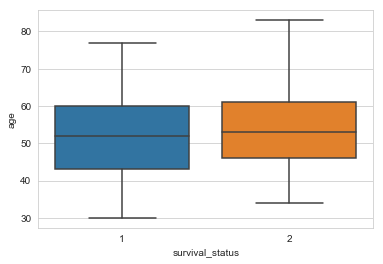

In [81]:
sns.boxplot(x='survival_status',y='age',data=haberman)
plt.show();

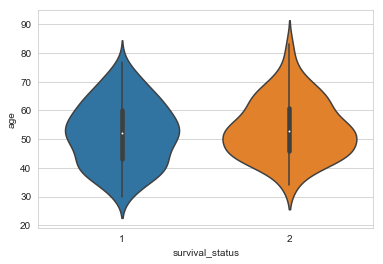

In [82]:
sns.violinplot(x='survival_status',y='age',data=haberman)
plt.show();

Observation

1. Patients with age more than 80 had less chance of surviving. 
It is hard to analyze because most of datapoints are overlapping

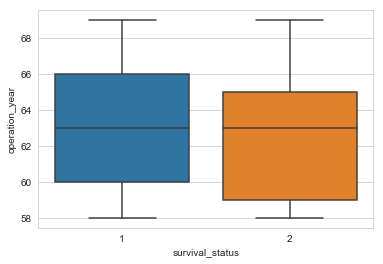

In [84]:
sns.boxplot(x='survival_status',y='operation_year',data=haberman)
plt.show();

Observation
1. Patients operated between 1959 and 1960 had less chance of surviving


# Final Conclusion


1. Patients who have axil nodes between 0 to 4 has more chances of surviving
2. Patients operated between 1959 and 1960 had less chance of surviving
3. Patients with age more than 80 had less chance of surviving. It is hard to analyze because most of datapoints are overlapping
4. Patients with age less than 60 has more chance of surviving
5. It is difficult to classify the class 